# Value at Risk with GARCH

<b>GARCH (Generalized AutoRegressive Conditional Heteroskedasticity)</b> model is an approach to estimate volatility. The equation of the <b>GARCH(1, 1)</b> model:

$$
\begin{equation}
    \sigma_t^2 = \omega + \alpha \varepsilon_{t-1}^2 + \beta \sigma_{t-1}^2
\end{equation}
$$
​
Where:
* $ \sigma_t^2 $ - conditional volatility (volatility of a random variable given some extra information) at time $ t $
* $ \omega $ is the constant term
* $ \alpha $ is the coefficient of the lagged squared error term
* $ \varepsilon_{t-1}^2 $ is the squared error term at time $ t-1 $
* $ \beta $ is the coefficient of the lagged conditional variance term
* $ \sigma_{t-1}^2 $ is the conditional variance at time $ t-1 $

GARCH model is more developed ARCH (AutoRegressive Conditional Heteroskedasticity) as it assumes that the variance of the error term follows an autoregressive moving average process. The main idea is to capture volatility clustering. It means that large changes are followed by large changes, and small changes are followed by small changes. That is the reason why we include past realizations in the equation.

In this notebook, I will estimate the returns volatility of Microsoft adjusted close price.

The notebook was created with this tutorial video: https://www.youtube.com/watch?v=NKHQiN-08S8


In [ ]:
import matplotlib.pyplot as plt
from arch import arch_model
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import pandas as pd
import math
from statsmodels.stats.diagnostic import acorr_ljungbox

data = yf.download("GOOG", start="2018-01-01", end="2023-12-01")
data['Return'] = 100 * data['Close'].pct_change()
data = data.dropna()
returns = data['Return'].dropna()

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'Google close price')

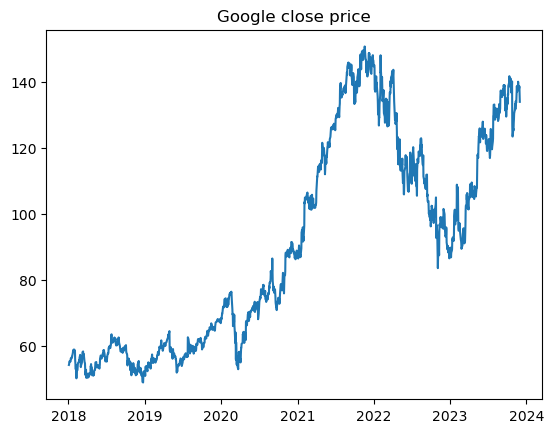

In [ ]:
plt.plot(data['Close'])
plt.title('Google close price')

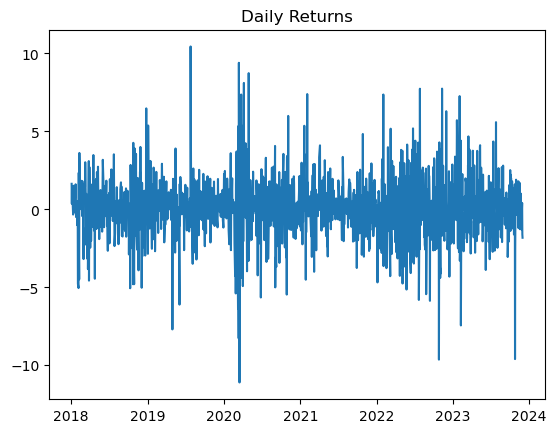

In [ ]:
plt.plot(returns)
plt.title('Daily Returns')
plt.show()

In [ ]:
std_daily = data['Return'].std()
mean_return = np.mean(data['Return'])

actual_var = [(x - mean_return) ** 2 for x in data['Return']][-365:]

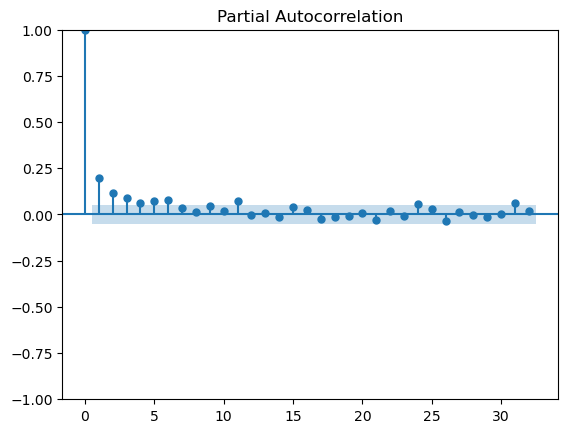

In [ ]:
plot_pacf(returns**2)
plt.show()

# Models

## GARCH (normal distribution)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 56377028860.113625
Iteration:      2,   Func. Count:     14,   Neg. LLF: 51295276.427478865
Iteration:      3,   Func. Count:     22,   Neg. LLF: 3076.160589635757
Iteration:      4,   Func. Count:     28,   Neg. LLF: 614510890.7134135
Iteration:      5,   Func. Count:     34,   Neg. LLF: 3056.060926231218
Iteration:      6,   Func. Count:     40,   Neg. LLF: 3039.3850499436976
Iteration:      7,   Func. Count:     46,   Neg. LLF: 3069.507888780714
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3037.6671644195667
Iteration:      9,   Func. Count:     59,   Neg. LLF: 3037.623405004747
Iteration:     10,   Func. Count:     64,   Neg. LLF: 3037.62337927079
Iteration:     11,   Func. Count:     69,   Neg. LLF: 3037.6233780412945
Iteration:     12,   Func. Count:     74,   Neg. LLF: 3037.6233774606762
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3037.6233774606762
            Iterations

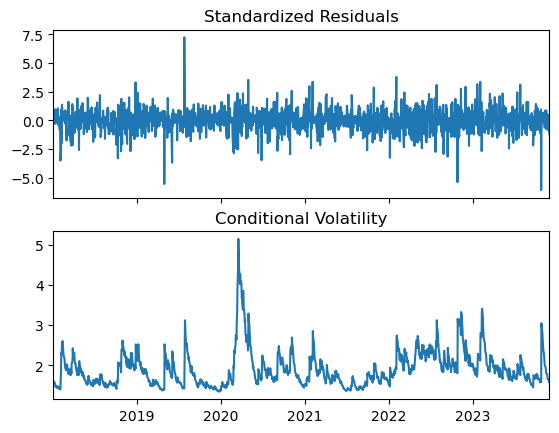

In [ ]:
am = arch_model(returns, p = 1, q = 1, mean = 'ar', vol = 'GARCH', dist = 'normal')

normal_result = am.fit()

print(normal_result.summary())

normal_result.plot()
plt.show()

## GARCH (skewed Student's t-distribution)

Iteration:      1,   Func. Count:      8,   Neg. LLF: 39874.80832041515
Iteration:      2,   Func. Count:     18,   Neg. LLF: 74986.80807751568
Iteration:      3,   Func. Count:     27,   Neg. LLF: 58027.11012496721
Iteration:      4,   Func. Count:     36,   Neg. LLF: 85415.57084309858
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4228.358699071239
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2957.8730942832876
Iteration:      7,   Func. Count:     61,   Neg. LLF: 2945.752542671016
Iteration:      8,   Func. Count:     68,   Neg. LLF: 2970.6222538455363
Iteration:      9,   Func. Count:     76,   Neg. LLF: 3016.171111308628
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2943.383686459597
Iteration:     11,   Func. Count:     93,   Neg. LLF: 2943.307825987762
Iteration:     12,   Func. Count:    100,   Neg. LLF: 2943.3025295149264
Iteration:     13,   Func. Count:    108,   Neg. LLF: 2943.2257256731027
Iteration:     14,   Func. Count:    115,   Neg. LLF: 2943.2

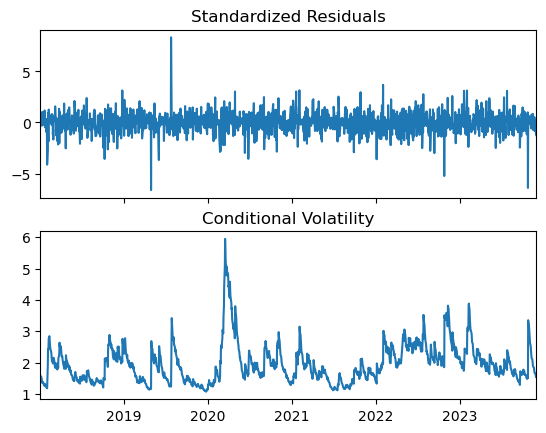

In [ ]:
am = arch_model(returns, p = 1, q = 1, mean = 'ar', vol = 'GARCH', dist = 'skewt')

skewt_result = am.fit()

print(skewt_result.summary())

skewt_result.plot()
plt.show()

## GJR-GARCH

Iteration:      1,   Func. Count:      8,   Neg. LLF: 33088.19572250616
Iteration:      2,   Func. Count:     17,   Neg. LLF: 27729.98432788616
Iteration:      3,   Func. Count:     26,   Neg. LLF: 7232.050785052063
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5176.073166164428
Iteration:      5,   Func. Count:     46,   Neg. LLF: 3965.8670860670995
Iteration:      6,   Func. Count:     54,   Neg. LLF: 2938.6706920580255
Iteration:      7,   Func. Count:     62,   Neg. LLF: 3874.177977978991
Iteration:      8,   Func. Count:     70,   Neg. LLF: 3054.3391904429327
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2938.584240353864
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2935.646110601753
Iteration:     11,   Func. Count:     93,   Neg. LLF: 2935.515979983633
Iteration:     12,   Func. Count:    100,   Neg. LLF: 2935.510766101323
Iteration:     13,   Func. Count:    107,   Neg. LLF: 2935.509666988527
Iteration:     14,   Func. Count:    114,   Neg. LLF: 2935.50

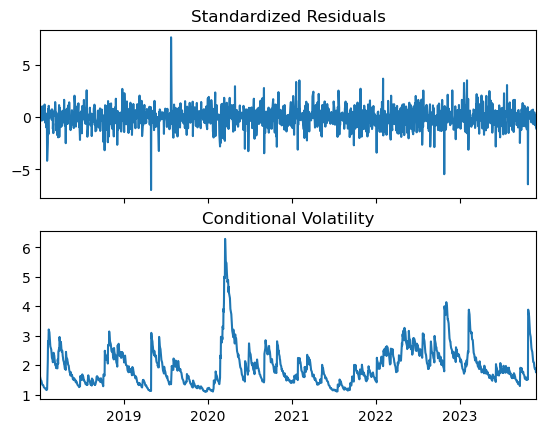

In [ ]:
am = arch_model(data['Return'], p = 1, q = 1, o = 1, mean='ar', vol = 'GARCH', dist = 't')

gjr_result = am.fit()

print(gjr_result.summary())

gjr_result.plot()
plt.show()

## EGARCH

Iteration:      1,   Func. Count:      8,   Neg. LLF: 25167.41690234674
Iteration:      2,   Func. Count:     21,   Neg. LLF: 30646.61733141356
Iteration:      3,   Func. Count:     32,   Neg. LLF: 41868.82298535282
Iteration:      4,   Func. Count:     43,   Neg. LLF: 14130.500583674537
Iteration:      5,   Func. Count:     53,   Neg. LLF: 4645.108381939304
Iteration:      6,   Func. Count:     63,   Neg. LLF: 4142.428999825605
Iteration:      7,   Func. Count:     71,   Neg. LLF: 2929.292376346446
Iteration:      8,   Func. Count:     78,   Neg. LLF: 2929.0207741716663
Iteration:      9,   Func. Count:     85,   Neg. LLF: 2928.817397726125
Iteration:     10,   Func. Count:     92,   Neg. LLF: 2928.755355223268
Iteration:     11,   Func. Count:     99,   Neg. LLF: 2928.744329879248
Iteration:     12,   Func. Count:    106,   Neg. LLF: 2928.7411229502104
Iteration:     13,   Func. Count:    113,   Neg. LLF: 2928.740945576462
Iteration:     14,   Func. Count:    120,   Neg. LLF: 2928.74

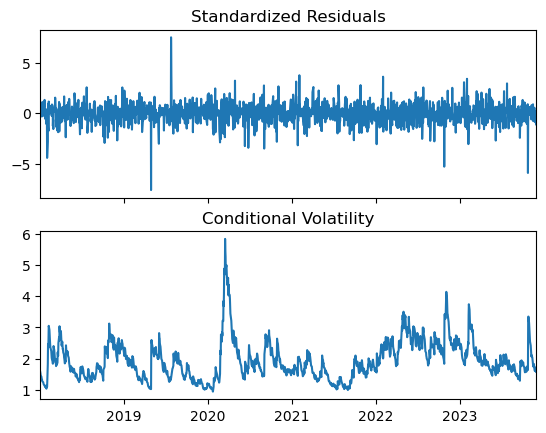

In [ ]:
am = arch_model(data['Return'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

egarch_result = am.fit()

print(egarch_result.summary())

egarch_result.plot()
plt.show()

## Log-likelihood

In [ ]:
print('Log-likelihood of GARCH (normal distribution) :', normal_result.loglikelihood)
print("Log-likelihood of GARCH (skewed Student's t-distribution):", skewt_result.loglikelihood)
print('Log-likelihood of GJR-GARCH :', gjr_result.loglikelihood)
print('Log-likelihood of EGARCH :', egarch_result.loglikelihood)

Log-likelihood of GARCH (normal distribution) : -3037.6233774606762
Log-likelihood of GARCH (skewed Student's t-distribution): -2943.2246343047645
Log-likelihood of GJR-GARCH : -2935.509497315929
Log-likelihood of EGARCH : -2928.740942625507


## Akaike information criterion

In [ ]:
print('AIC of GARCH model (normal distribution):', normal_result.aic)
print("AIC of GARCH model (skewed Student's t-distribution) :", skewt_result.aic)
print('AIC of GJR-GARCH model :', gjr_result.aic)
print('AIC of EGARCH model :', egarch_result.aic)

AIC of GARCH model (normal distribution): 6083.2467549213525
AIC of GARCH model (skewed Student's t-distribution) : 5898.449268609529
AIC of GJR-GARCH model : 5883.018994631858
AIC of EGARCH model : 5869.481885251014


## Bayesian information criterion

In [ ]:
print('BIC of GARCH model (normal distribution):', normal_result.bic)
print("BIC of GARCH model (skewed Student's t-distribution):", skewt_result.bic)
print('BIC of GJR-GARCH model:', gjr_result.bic)
print('BIC of EGARCH model:', egarch_result.bic)

BIC of GARCH model (normal distribution): 6104.467507782924
BIC of GARCH model (skewed Student's t-distribution): 5930.280397901887
BIC of GJR-GARCH model: 5914.850123924216
BIC of EGARCH model: 5901.313014543372


The <b>EGARCH model<b> has a higher log-likelihood, lower AIC and BIC, hence is relatively better.

## Ljung-Box test

If a GARCH model is doing a good job, the standardized residuals should not exhibit autocorrelations. In this case no autocorrelations were detected and the model is doing a decent job.

In [ ]:
res_resid = egarch_result.resid
res_std = egarch_result.conditional_volatility

# Standardized residuals
std_resid = res_resid /res_std

lb_test = acorr_ljungbox(std_resid , lags = 10, return_df = True)

print('P-value: ', lb_test.iloc[0,1])

P-value:  0.4586083827766434


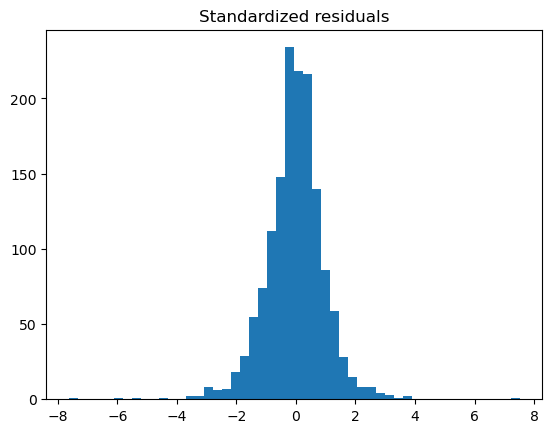

In [ ]:
plt.hist(std_resid, bins = 50)
plt.title('Standardized residuals')
plt.show()

# Predictions with rolling window (EGARCH)

<b>EGARCH</b> adds a conditional component to model the asymmetry in shocks similar to the GJR-GARCH.

In [ ]:
var_results = pd.DataFrame()
VaR_parametric = []
VaR_empirical = []

index = returns.index
start_loc = 0
end_loc = len(data) - 252
forecasts = {}
am = arch_model(returns, p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

for i in range(252):
   res = am.fit(first_obs=i, last_obs=i + end_loc, disp="off")
   temp = res.forecast(horizon=1, reindex=False)
   mean_forecast = temp.mean.iloc[0]
   fcast = temp.variance.iloc[0]
   forecasts[fcast.name] = fcast

   res_resid = res.resid
   res_std = res.conditional_volatility
   # Standardized residuals
   std_resid = res_resid /res_std

   #parametric VaR
   VaR_parametric.append(mean_forecast + am.distribution.ppf(0.05, res.params.nu) * np.sqrt(fcast[0]))

   #empirical VaR
   VaR_empirical.append(mean_forecast + np.sqrt(fcast[0]) * std_resid.quantile(0.05))


var_results['VaR parametric'] = VaR_parametric
var_results['VaR empirical'] = VaR_empirical
var_results.index = data.index[-252:]

forecast_var = pd.DataFrame(forecasts).T
forecast_std = np.sqrt(forecast_var)

In [ ]:
def standard_deviation(returns, window, clean=True):
    result = returns.rolling(window=window, center=False).std()
    if clean:
        return result.dropna()
    else:
        return result

# Backtesting

We can see that the model captures volatility pretty well both in the first and the second figure.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(observation, forecast): 
    mae = mean_absolute_error(observation, forecast)
    print('Mean Absolute Error (MAE): {:.3g}'.format(mae))
    
    mse = mean_squared_error(observation, forecast)
    print('Mean Squared Error (MSE): {:.3g}'.format(mse))
    return mae, mse

evaluate(standard_deviation(returns, 21)[-252:], forecast_std)

Mean Absolute Error (MAE): 0.286
Mean Squared Error (MSE): 0.128


(0.28576807502518853, 0.12821640414265315)

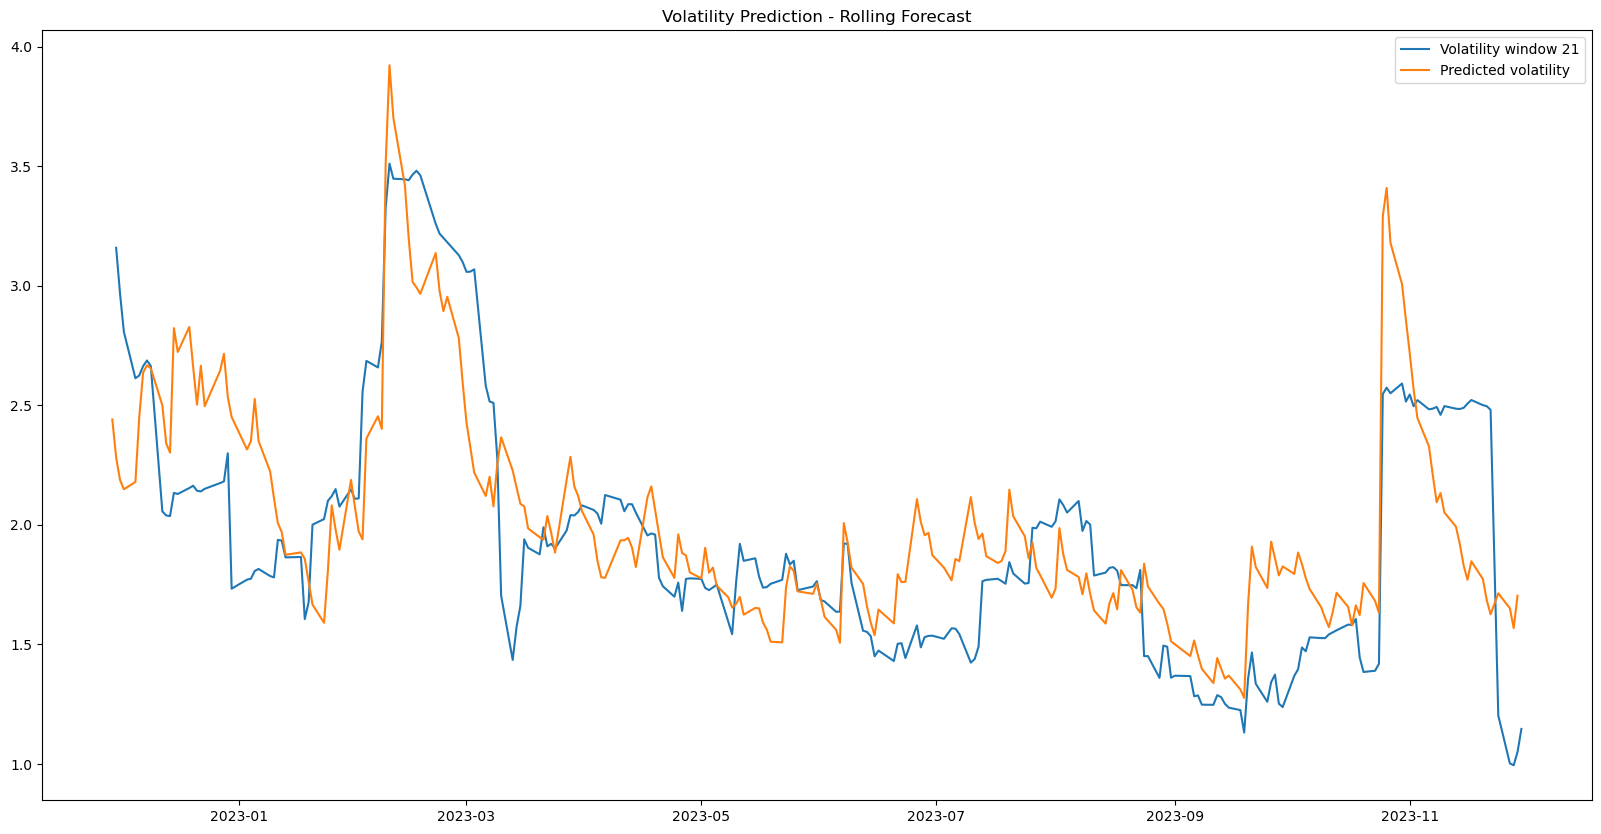

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(standard_deviation(returns, 21)[-252:], label='Volatility window 21')
plt.plot(forecast_std, label='Predicted volatility')
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend()
plt.show()

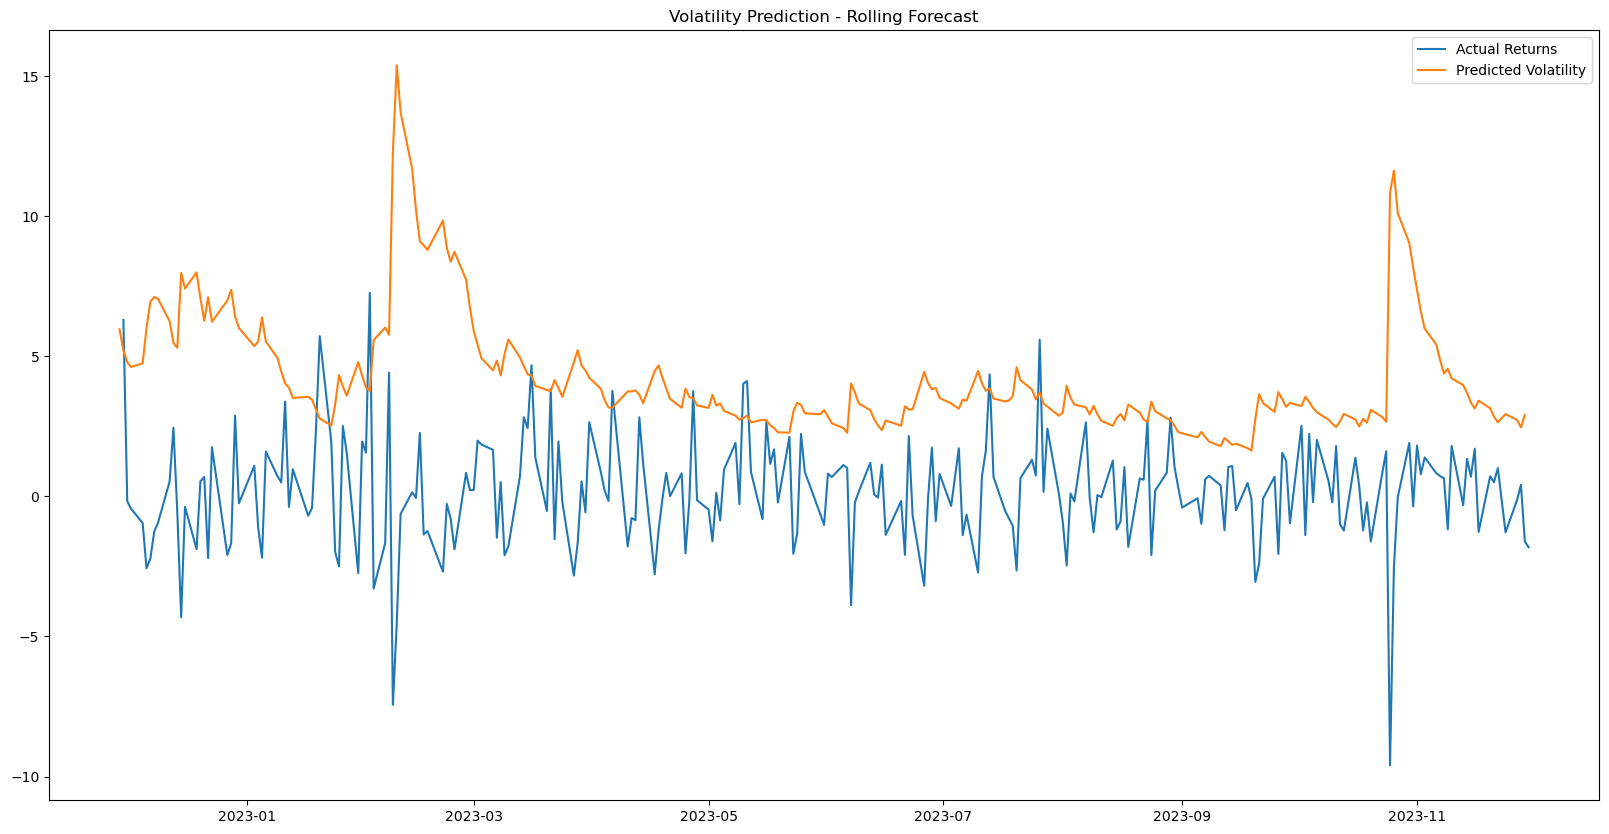

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(returns[-252:], label='Actual Returns')
plt.plot(forecast_var, label='Predicted Volatility')
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend()
plt.show()

# Value at Risk (VaR)

* The <b>parametric VaR</b> with GARCH is estimated using quantiles from a parametric approach. That is, it is based on GARCH <b>assumed distribution</b> of the standardized residuals.
* The <b>empirical VaR</b> with GARCH is estimated with an empirical approach. That is, it is based on the <b>observed distribution</b> of the GARCH standardized residuals. 

d:\anaconda\Lib\site-packages\matplotlib\cbook\__init__.py:1340: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


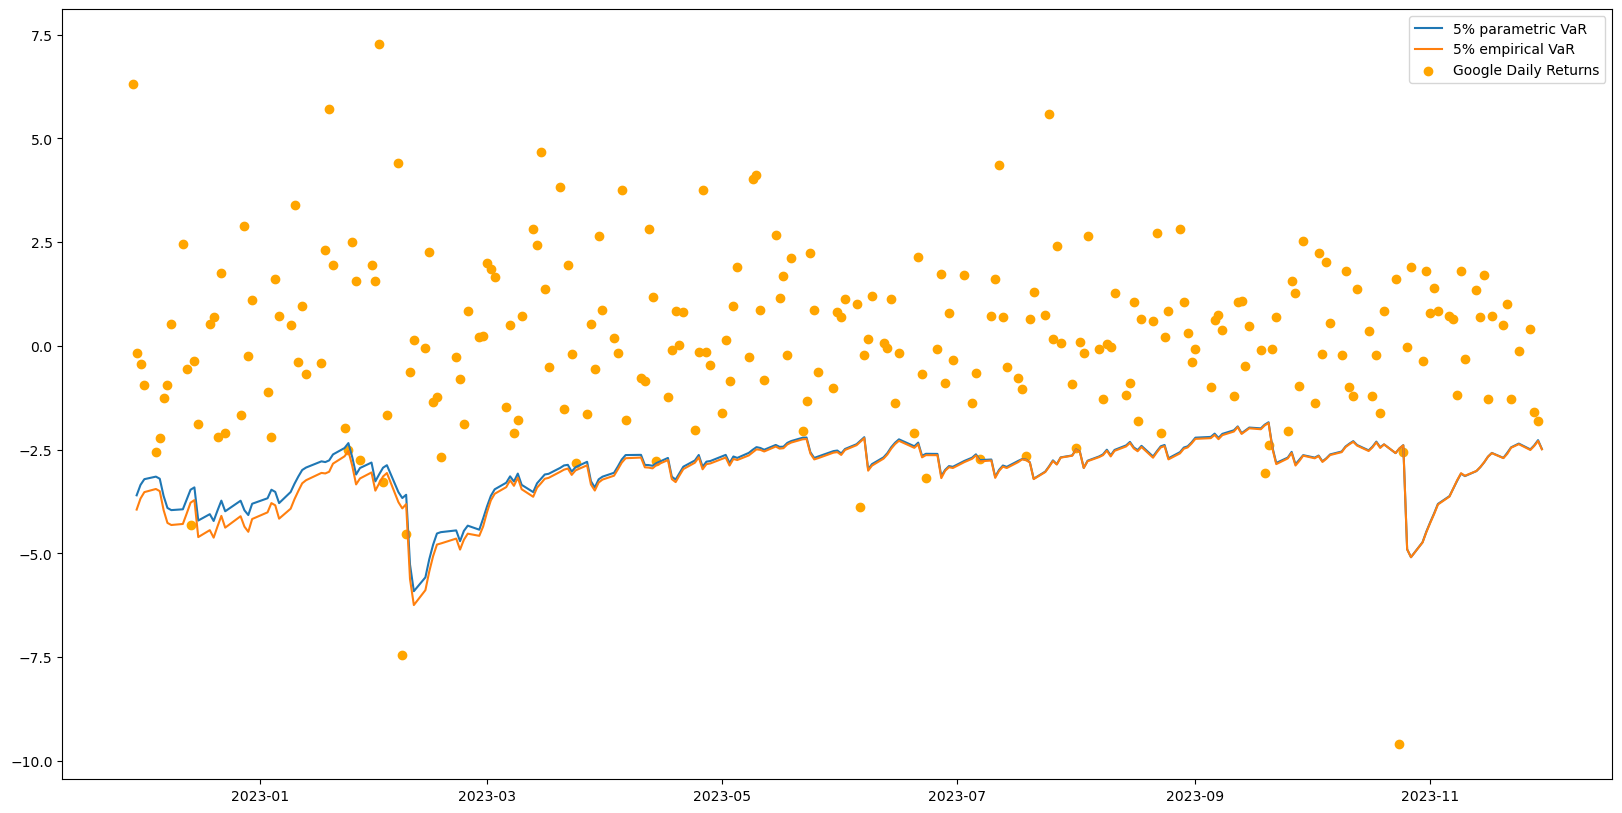

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(var_results['VaR parametric'], label='5% parametric VaR')
plt.plot(var_results['VaR empirical'], label='5% empirical VaR')
plt.scatter(forecast_var.index,data.Return[-252:], color = 'orange', label = 'Google Daily Returns')
plt.legend()
plt.show()